In [59]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import networkx as nx
import scienceplots
import seaborn as sns
import matplotlib.animation as animation

N_voltages      = 200
max_time        = 1e-4
time_steps      = np.linspace(0,max_time,N_voltages)

# Main

In [60]:
dic     = {}
dic_t   = {}    

for f_mult in [0.1,0.5,1,1.5,2,2.5,3,3.5,4,4.5,5]:
# for f_mult in [2]:

    df          = pd.read_csv(f"time_Nx=2_Ny=2_Nz=1_Ne=2_0_f{f_mult}.csv")
    df          = df.drop(columns=['E1','G','Eq_Jumps','Jumps','Error'])
    df.columns  = ['I','O1']

    for i in range(1,10):

        df_tmp          = pd.read_csv(f"time_Nx=2_Ny=2_Nz=1_Ne=2_{i}_f{f_mult}.csv")
        df[f'O{i+1}']   = df_tmp['Current'].values
    
    df['O']         = df.iloc[:,1:].mean(axis=1)
    df['sO']        = df.iloc[:,1:].std(axis=1)
    df              = df[['I','O','sO']]
    
    dic[f_mult] = df

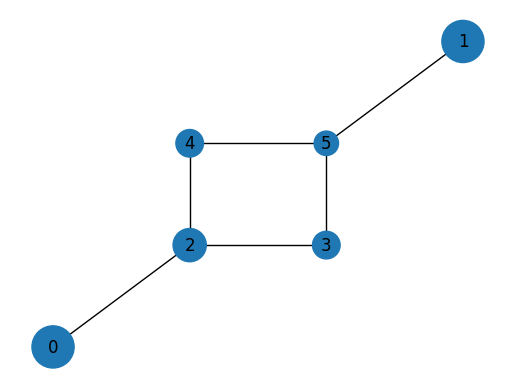

/home/jonas/.local/lib/python3.10/site-packages/matplotlib/collections.py:967: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


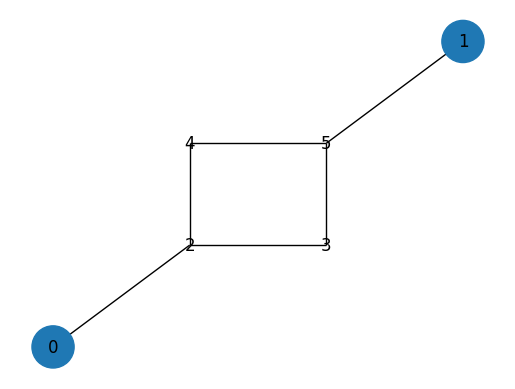

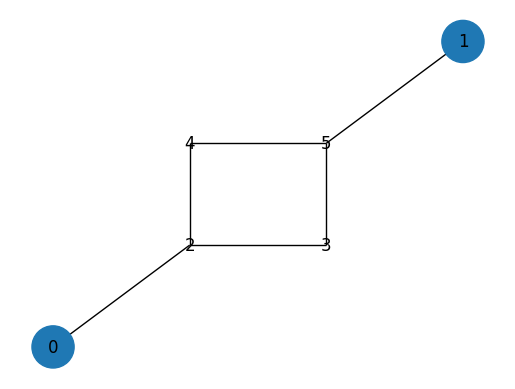

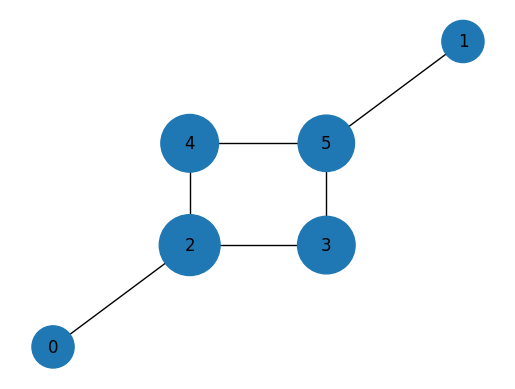

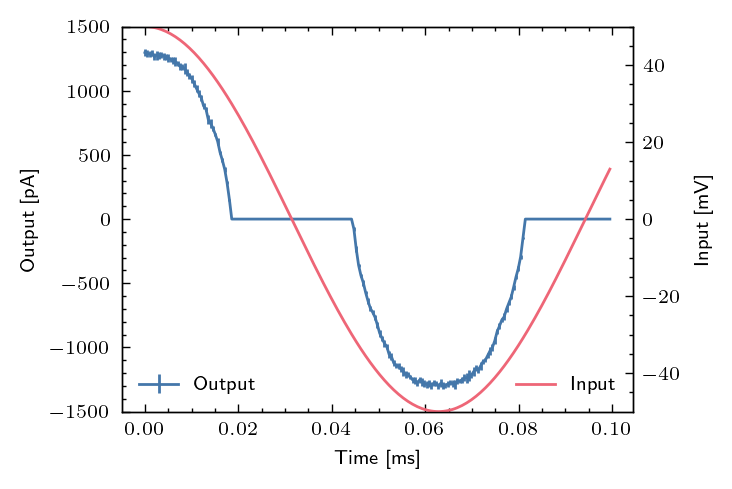

In [61]:
blue_color          = '#4477AA'
red_color           = '#EE6677'
df                  = dic[0.5]

with plt.style.context(["science","nature","bright"]):
    
    fig, ax1    = plt.subplots(dpi=200)
    ax2         = ax1.twinx()

    ax1.errorbar(x=time_steps[:-1]*1000 ,y=df['O'], yerr=df['sO'], c=blue_color)
    ax2.plot(time_steps[:-1]*1000, df['I']*1000, c=red_color)
    ax1.set_xlabel("Time [ms]")
    ax1.set_ylabel("Output [pA]")
    ax2.set_ylabel("Input [mV]")

    ax1.legend(['Output'], loc='lower left')
    ax2.legend(['Input'], loc='lower right')

    ax1.set_ylim(-1500,1500)
    ax2.set_ylim(-50,50)

plt.show()

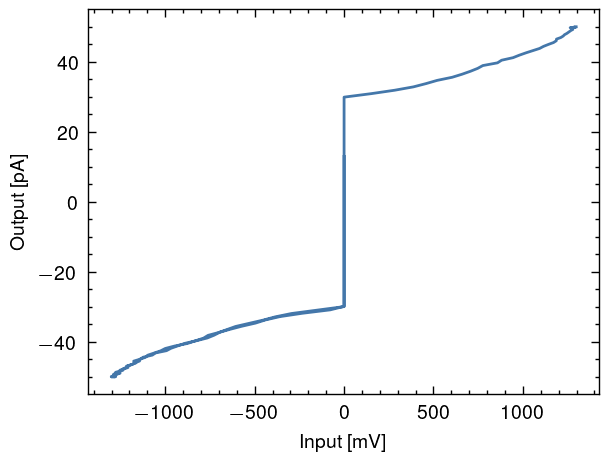

In [62]:
with plt.style.context(["science","nature","bright"]):
    
    fig, ax1    = plt.subplots(dpi=200)
    df          = dic[0.5]

    ax1.plot(df['O'], df['I']*1000)
    ax1.set_xlabel("Input [mV]")
    ax1.set_ylabel("Output [pA]")
    plt.show()

# States

In [63]:
f_mult          = 2
states          = pd.read_csv(f"time_mean_state_Nx=2_Ny=2_Nz=1_Ne=2_6_f{f_mult}.csv")
states.columns  = [i for i in range(2,6)]
states[0]       = 100
states[1]       = 100
states          = states[[0,1,2,3,4,5]]
edges   = pd.read_csv(f"time_net_currents_Nx=2_Ny=2_Nz=1_Ne=2_0_f{f_mult}.csv").columns
pos     = {0:(0,0),
           1:(1.5,1.5),
           2:(0.5,0.5),
           3:(1,0.5),
           4:(0.5,1),
           5:(1,1),
           }

G       = nx.Graph()
G.add_edges_from([eval(i) for i in edges])

In [64]:
fig     = plt.figure()
ax_c    = []

for row in range(len(states)):

    node_sizes  = {j:np.abs(states.iloc[row,j]) for j in range(6)}
    size        = np.array([node_sizes[0],node_sizes[2],node_sizes[1],node_sizes[5],node_sizes[3],node_sizes[4]])

    ax = fig.add_subplot()
    nx.draw_networkx(G, pos=pos, node_size=200*np.log(size), ax=ax)
    plt.axis('off')
    
    ax_c.append([ax])

ani = animation.ArtistAnimation(fig=fig, artists=ax_c, interval=50, repeat_delay=500)

/home/jonas/.local/lib/python3.10/site-packages/matplotlib/collections.py:967: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


In [65]:
ani.save("test.gif")

MovieWriter ffmpeg unavailable; using Pillow instead.
/home/jonas/.local/lib/python3.10/site-packages/matplotlib/collections.py:967: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor
